# Simple GAN example

## Import modules

The file `gan_model.py` contains the actual Generative Adversarial Network model. We need `loadqd` function to load the "Quick, Draw!" dataset examples contained in the file `full_numpy_bitmap_bird.npy` (you can download the file [here](https://console.cloud.google.com/storage/browser/_details/quickdraw_dataset/full/numpy_bitmap/bird.npy)).

In [1]:
import os
import matplotlib.pyplot as plt

from gan_model import *
from load_qd import loadqd

We create three directories for model graph png, generated/sampled images and saved weights.

In [2]:
DATA_NAME = 'bird'
RUN_FOLDER = 'run/{}/'.format(DATA_NAME)

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'structure'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

Default mode is *build*. You may set *load* once the whole network is trained. 

In [3]:
mode = 'build' # 'load'

## Load data

There are 80000 birds doodles whose dimension is 28 x 28 pixels (grayscale images). 

In [4]:

(x_train, y_train) = loadqd(DATA_NAME)

In [5]:
x_train.shape

(80000, 28, 28, 1)

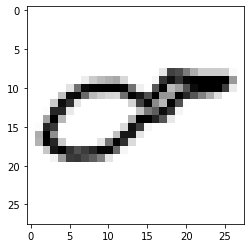

In [6]:
plt.imshow(x_train[300,:,:,0], cmap = 'gray_r')

## GAN architecture

Set a GAN instance. Define the discriminator and the generator networks, the optimizer and the random noise data size (`z_dim`, the generator's input). Batch Normalization needs a momentum parameter that is used in the inference step (no training): the layer normalizes its output using a moving average of the mean and standard deviation of the batches it has seen during training. These moving averages are non-trainable parameters that update through a *momentum* coefficient ([details](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization)), set using `..._batch_norm_momentum` .

In [7]:
gan = GAN(input_dim = (28,28,1),
          discriminator_conv_filters = [64,64,128,128],
          discriminator_conv_kernel_size = [5,5,5,5],
          discriminator_conv_strides = [2,2,2,1],
          discriminator_batch_norm_momentum = None,
          discriminator_activation = 'relu',
          discriminator_dropout_rate = 0.4,
          discriminator_learning_rate = 0.0008,
          generator_initial_dense_layer_size = (7, 7, 64),
          generator_upsample = [2,2, 1, 1],
          generator_conv_filters = [128,64, 64,1],
          generator_conv_kernel_size = [5,5,5,5],
          generator_conv_strides = [1,1, 1, 1],
          generator_batch_norm_momentum = 0.9,
          generator_activation = 'relu',
          generator_dropout_rate = None,
          generator_learning_rate = 0.0004,
          optimizer = 'rmsprop',
          z_dim = 80)

if mode == 'build':
    gan.save(RUN_FOLDER)
else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

Discriminator and generator models' summaries. Graphs are in the `structure` folder.

In [8]:
gan.discriminator.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa [(None, 28, 28, 1)]       0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 14, 14, 64)        1664      
_________________________________________________________________
activation (Activation)      (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 7, 7, 64)          102464    
_________________________________________________________________
activation_1 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0     

In [9]:
gan.generator.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) [(None, 80)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              254016    
_________________________________________________________________
batch_normalization (BatchNo (None, 3136)              12544     
_________________________________________________________________
activation_4 (Activation)    (None, 3136)              0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
generator_conv_0 (Conv2D)    (None, 14, 14, 128)       2049

## Training

In [10]:
BATCH_SIZE = 64
EPOCHS = 1000 #5000 or more recommended
PRINT_EVERY_N_BATCHES = 50

In [11]:
gan.train(x_train,
          batch_size = BATCH_SIZE,
          epochs = EPOCHS,
          run_folder = RUN_FOLDER,
          print_every_n_batches = PRINT_EVERY_N_BATCHES)

0 [D loss: (0.714)(R 0.704, F 0.725)] [D acc: (0.109)(0.219, 0.000)] [G loss: 0.680] [G acc: 1.000]
50 [D loss: (0.495)(R 0.213, F 0.776)] [D acc: (0.648)(0.922, 0.375)] [G loss: 0.866] [G acc: 0.141]
100 [D loss: (0.470)(R 0.296, F 0.644)] [D acc: (0.773)(0.906, 0.641)] [G loss: 0.922] [G acc: 0.188]
150 [D loss: (0.588)(R 0.597, F 0.578)] [D acc: (0.734)(0.734, 0.734)] [G loss: 0.620] [G acc: 0.750]
200 [D loss: (0.690)(R 0.709, F 0.672)] [D acc: (0.531)(0.078, 0.984)] [G loss: 0.720] [G acc: 0.000]
250 [D loss: (0.670)(R 0.644, F 0.695)] [D acc: (0.547)(0.484, 0.609)] [G loss: 0.729] [G acc: 0.094]
300 [D loss: (0.690)(R 0.670, F 0.711)] [D acc: (0.453)(0.406, 0.500)] [G loss: 0.747] [G acc: 0.156]
350 [D loss: (0.673)(R 0.660, F 0.685)] [D acc: (0.570)(0.516, 0.625)] [G loss: 0.743] [G acc: 0.156]
400 [D loss: (0.667)(R 0.606, F 0.727)] [D acc: (0.594)(0.641, 0.547)] [G loss: 0.863] [G acc: 0.141]
450 [D loss: (0.684)(R 0.641, F 0.727)] [D acc: (0.547)(0.562, 0.531)] [G loss: 0.884

## Loss and accuracy

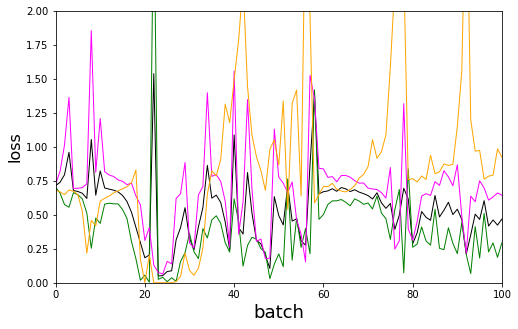

In [12]:
fig = plt.figure(figsize=(8,5))
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=1)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=1)
plt.plot([x[2] for x in gan.d_losses], color='magenta', linewidth=1)
plt.plot([x[0] for x in gan.g_losses], color='orange', linewidth=1)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 100)
plt.ylim(0, 2)

plt.show()


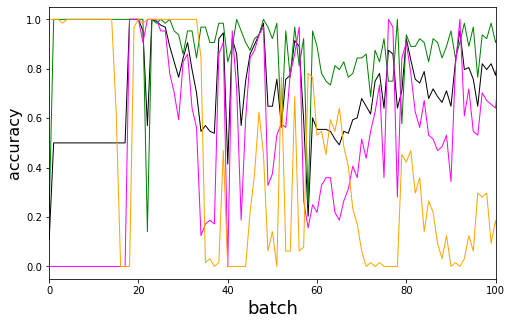

In [13]:
fig = plt.figure(figsize=(8,5))
plt.plot([x[3] for x in gan.d_losses], color='black', linewidth=1)
plt.plot([x[4] for x in gan.d_losses], color='green', linewidth=1)
plt.plot([x[5] for x in gan.d_losses], color='magenta', linewidth=1)
plt.plot([x[1] for x in gan.g_losses], color='orange', linewidth=1)

plt.xlabel('batch', fontsize=18)
plt.ylabel('accuracy', fontsize=16)

plt.xlim(0, 100)

plt.show()

## Visualizations

In [14]:
def compare_images(img1, img2):
    return np.mean(np.abs(img1 - img2))

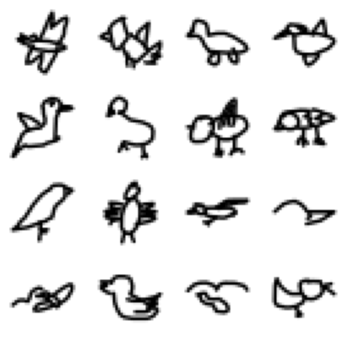

In [15]:
import numpy as np
r, c = 4, 4 # r x c grid

# select image indices
idx = np.random.randint(0, x_train.shape[0], BATCH_SIZE) 
# rescale images to range [0,1]
true_imgs = (x_train[idx] + 1)*0.5 

# true images plot
fig, axs = plt.subplots(r, c, figsize=(6,6))
cnt = 0

for i in range(r):
    for j in range(c):
        axs[i,j].imshow(true_imgs[cnt], cmap = 'gray_r')
        axs[i,j].axis('off')
        cnt += 1

plt.show()
fig.savefig(os.path.join(RUN_FOLDER, "images/real.png"))

plt.close()

## Comparing generated and true images

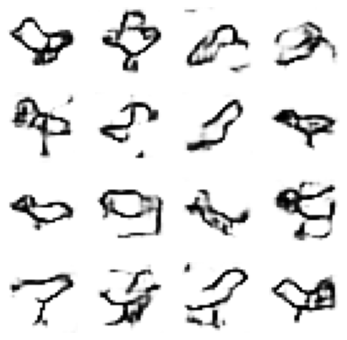

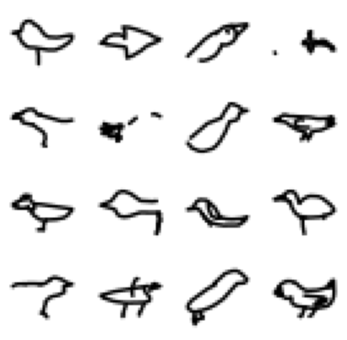

In [16]:
r, c = 4, 4
noise = np.random.normal(0, 1, (r * c, gan.z_dim))
gen_imgs = gan.generator.predict(noise)

# rescale images to range [0,1]
gen_imgs = 0.5 * (gen_imgs + 1)

fig, axs = plt.subplots(r, c, figsize=(6,6))
cnt = 0

for i in range(r):
    for j in range(c):
        axs[i,j].imshow(np.squeeze(gen_imgs[cnt, :,:,:]), cmap = 'gray_r')
        axs[i,j].axis('off')
        cnt += 1
plt.show()
fig.savefig(os.path.join(RUN_FOLDER, "images/sample.png"))
plt.close()


fig, axs = plt.subplots(r, c, figsize=(6,6)) 
cnt = 0

for i in range(r):
    for j in range(c):
        c_diff = 99999
        c_img = None
        for k_idx, k in enumerate((x_train + 1) * 0.5):
            
            diff = compare_images(gen_imgs[cnt, :,:,:], k)
            if diff < c_diff:
                c_img = np.copy(k)
                c_diff = diff
        axs[i,j].imshow(c_img, cmap = 'gray_r')
        axs[i,j].axis('off')
        cnt += 1
plt.show()
fig.savefig(os.path.join(RUN_FOLDER, "images/sample_closest.png"))
plt.close()